# IBM Employee Attrition Analysis

## Introduction

Every company's most valuable asset is undoubtedly its employees. However, when an employee leaves, it not only leave a position vacant bit also results in the loss of institutional memory, talent and investment. The IBM HR Analytics dataset is a fictional dataset which offeres a unique opportunity to understand the reasons for these losses. It provides a detailed look at the career paths, satisfaction levels and other factors influencing the decision to leave for thousands of employees. This analysis focuses on making sense of this seemingly numerical data, exploring the human story behind each line and shedding light on why employees decide to leave.

## Purpose

The primary goal of this data analysis is to identify the key factors affecting employee turnover. Using the variables in the dataset, we aimed to identify the factors that most significantly increase or decrease the risk of employee turnover. The findings from this analysis will help companies develop more effective human resources strategies. For example, concrete recommendations can be made regarding areas to focus on to increase employee satisfaction, ensure work-life balance, and strengthen employee engagement. This will not only reduce turnover rates but also create a more productive and engaged workforce.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # For splitting the dataset into training and test sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.linear_model import LogisticRegression  # For building the classification model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve  # For model evaluation

## The Data

(Data source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.)

The dataset created by IBM contains information on employee satisfaction, income, job seniority and other demographics. A summary of the data is given below.

Summary:

- Dataset Structure: 1470 observations, 35 features
- Missing Data: There is no missing data
- Data Type: There are only 2 data types. Factors and integers
- Target Variable: Attrition
- Imbalanced dataset: 1237 (84% of cases) employees have left the organization while 237 (16% of cases) have left the organization making the dataset to be considered imbalanced since more people stay in the organization than they actually leave.

<table class="t1" cellspacing="0" cellpadding="0">
    <tr>
        <th><p>Name</p></th>
        <th><p>Description</p></th>
    <tr>
<tbody>
<tr>
<td class="td1" valign="top">
<p class="p1">Age</p>
</td>
<td class="td1" valign="top">
<p class="p1">Age of employee ranging from 18 to 60. Average of 36 years</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Attrition</p>
</td>
<td class="td1" valign="top">
<p class="p1">Employee leaving the company (0=no, 1=yes)</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Business Travel</p>
</td>
<td class="td1" valign="top">
<p class="p1">Travel_Rarely/ Travel_Frequently/ Non-Travel</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Department</p>
</td>
<td class="td1" valign="top">
<p class="p1">Sales/ Research &amp; Development/ Human Resources</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Distance From Home</p>
</td>
<td class="td1" valign="top">
<p class="p1">Distance travelled ranging from 1km to 29km. Average of 9km</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Education</p>
</td>
<td class="td1" valign="top">
<p class="p1">Int values from 1-5 indicating 1-Below College/ 2-College / 3-Bachelor<span class="Apple-converted-space">&nbsp; </span>4-Master / 5-Doctorate</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Education Field</p>
</td>
<td class="td1" valign="top">
<p class="p1">Medical/ Life Sciences/ Technical Degree/ Marketing/ Other</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1"><span class="s1">Employee Count</span></p>
</td>
<td class="td1" valign="top">
<p class="p1">A single numerical value</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Employee Number</p>
</td>
<td class="td1" valign="top">
<p class="p1">Employee identification number</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Environment Satisfaction</p>
</td>
<td class="td1" valign="top">
<p class="p1">Int values from 1-4 indicating 1 - Low / 2 - Medium / 3-High / 4-Very High</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Gender</p>
</td>
<td class="td1" valign="top">
<p class="p1">Male/ Female</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Job Involvement</p>
</td>
<td class="td1" valign="top">
<p class="p1">Int values ranging from 1-4 indicating 1-Low/ 2-Medium / 3-High / 4-Very High</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Job Level</p>
</td>
<td class="td1" valign="top">
<p class="p1">Int values ranging from 1-4 indicating which hierarchical level the employee is currently in</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Job Role</p>
</td>
<td class="td1" valign="top">
<p class="p1">Manager / Manufacturing Director / Healthcare Representative / Research Scientist / Laboratory Technician / Sales Representative / Sales Executive / Human Resources /</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Job Satisfaction</p>
</td>
<td class="td1" valign="top">
<p class="p1">Int values ranging from 1-4 indicating 1-Low/ 2-Medium / 3-High / 4-Very High</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Marital Status</p>
</td>
<td class="td1" valign="top">
<p class="p1">Single / Married / Divorced</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Hourly Rate</p>
</td>
<td class="td1" valign="top">
<p class="p1">The amount earned for each hour worked. Ranging from 30 USD to 100 USD. Average of 65 USD per hour</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Daily Rate</p>
</td>
<td class="td1" valign="top">
<p class="p1">The amount earned for each day worked. Ranging from 102 USD to 1499 USD. Average of 802 USD per day</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Monthly Rate</p>
</td>
<td class="td1" valign="top">
<p class="p1">A fixed amount paid for each month (salary - usually annual salary divided by 12). Ranging from 2,094 USD to 26,999 USD. Average of 14,313 USD per month</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Monthly Income</p>
</td>
<td class="td1" valign="top">
<p class="p1">The total amount of money earned and received during a specific month (varies for hourly workers and salaried employees). Ranging from 1,009 USD to 19,999 USD. Average of 6,502 USD per month</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Num Companies Worked</p>
</td>
<td class="td1" valign="top">
<p class="p1">Number of companies the employee has worked at overall. Ranging from 0 to 9 with an average of 2 companies.</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1"><span class="s1">Over 18</span></p>
</td>
<td class="td1" valign="top">
<p class="p1">Indicator (Y/N) whether the employee is over 18 or not</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">OverTime</p>
</td>
<td class="td1" valign="top">
<p class="p1">Indicator (Yes/No) whether the employee works over time or not</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Percent Salary Hike</p>
</td>
<td class="td1" valign="top">
<p class="p1">The increase in employee salary as a percentage of their previous salary. Ranging from 11% to 25% with an average of 15%</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Performance Rating</p>
</td>
<td class="td1" valign="top">
<p class="p1">Int values from 1-4 indicating 1-Low / 2-Good / 3-Excellent / 4-Outstanding. However only 3 &amp; 4 exist in dataset.</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Relationship Satisfaction</p>
</td>
<td class="td1" valign="top">
<p class="p1">Int values from 1-4 indicating 1-Low / 2-Medium / 3-High / 4-Very High</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1"><span class="s1">Standard Hours</span></p>
</td>
<td class="td1" valign="top">
<p class="p1">Numerical value representing the standard hours in a normal workweek</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Stock Option Level</p>
</td>
<td class="td1" valign="top">
<p class="p1">4 levels of stock options</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Total Working Years</p>
</td>
<td class="td1" valign="top">
<p class="p1">Total number of years working in the <strong>industry</strong> ranging from 0 to 40. Average of 11 years</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Training Times Last Year</p>
</td>
<td class="td1" valign="top">
<p class="p1">Number of times the employee went on training last year. Ranging from 0 to 6 times. Average of 2 times.</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Work Life Balance</p>
</td>
<td class="td1" valign="top">
<p class="p1">Int values from 1-4 indicating 1-Bad / 2-Good / 3-Better / 4-Best</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Years At Company</p>
</td>
<td class="td1" valign="top">
<p class="p1">Total number of years working in the <strong>company</strong> ranging from 0 to 40 years. Average of 7 years</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Years in Current Role</p>
</td>
<td class="td1" valign="top">
<p class="p1">Number of years working in the <strong>current role</strong> ranging from 0 to 18 years. Average of 4 years</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Years Since Last Promotion</p>
</td>
<td class="td1" valign="top">
<p class="p1">Number of years passed since their last promotion ranging from 0 to 15 years. Average of 2 years</p>
</td>
</tr>
<tr>
<td class="td1" valign="top">
<p class="p1">Years with Current Manager</p>
</td>
<td class="td1" valign="top">
<p class="p1">Number of years spent with the current manager ranging from 0 to 17 years. Average of 4 years</p>
</td>
</tr>
</tbody>
</table>

In [236]:
att_df = pd.read_csv("../data/ibm_employee_attrition.csv")
pd.set_option('display.max_columns', None)

In [237]:
att_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [238]:
att_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [239]:
att_df.isnull().sum() # Check for null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [240]:
att_df.nunique() #Check for unique records

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [241]:
att_df[att_df.duplicated()].sum() #Check for duplicated values

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [242]:
att_df = att_df.drop(columns=['EmployeeCount', 'EmployeeNumber',
                              'StandardHours', 'Over18'])

## The Target Variable

When we look at the distribution of attrition, we can see that the vast majority of employees remain in their jobs. 84% of employees did not quit the organization while 16% did leave the organization. 

The imbalance in the dataset will determine which approach will be best for our predictive model.

In [243]:
att_df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [244]:
percent_att = (att_df["Attrition"].value_counts(normalize=True)
              .mul(100).reset_index()
              .rename(columns={"Index":"Attrition", "Attrition":"Percentage"}))

In [245]:
percent_att

,index,Percentage
0,No,83.877551
1,Yes,16.122449


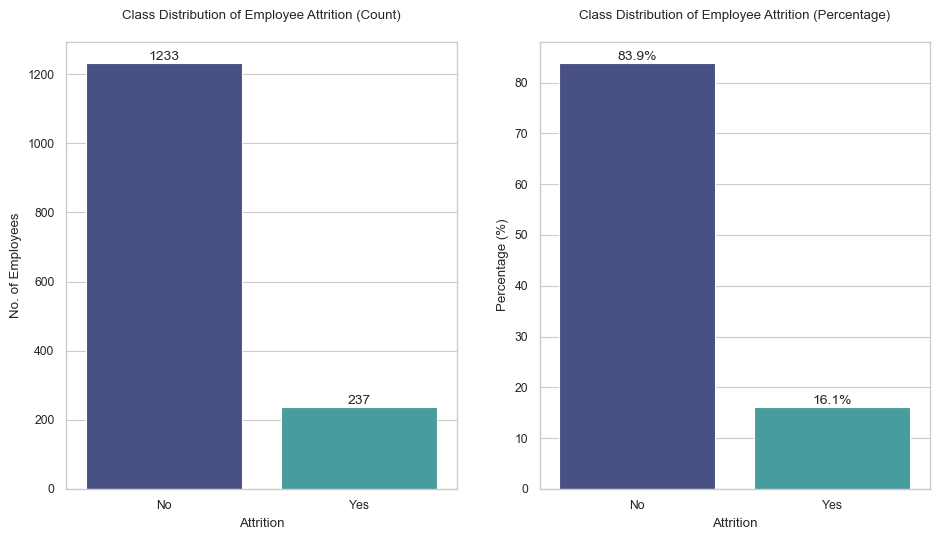

In [246]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Left: count plot
ax1 = sns.countplot(x="Attrition", order=att_df["Attrition"].value_counts().index, palette="mako", data=att_df, ax=axes[0])
ax1.bar_label(ax1.containers[0], fontsize=10)
ax1.set_title("Class Distribution of Employee Attrition (Count)\n")
ax1.set_xlabel("Attrition")
ax1.set_ylabel("No. of Employees")

# Right: percentage plot
ax2 = sns.barplot(x="index", y="Percentage", palette="mako", data=percent_att, ax=axes[1])
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", fontsize=10)
ax2.set_title("Class Distribution of Employee Attrition (Percentage)\n")
ax2.set_xlabel("Attrition")
ax2.set_ylabel("Percentage (%)")

plt.tight_layout(pad=3)
plt.show()

## Data Preprocessing

### Converting data types

In [247]:
#List of categorical columns
cat_cols = ['Attrition', 'BusinessTravel', 'Department', 
            'EducationField', 'Gender', 'StockOptionLevel',
            'MaritalStatus', 'OverTime', 'JobRole', 'PerformanceRating']

att_df[cat_cols] = att_df[cat_cols].astype('category')

### Removing Outliers

The numeric columns; Monthly Income, Years At Company and Total Working Years show a notable number of outliers while Years In Current Role, Years Since Last Promotion and Years with Current Manager show outliers but lower in count.

A total of 14 outliers are observed and removed by using the Interquartile Range Method.

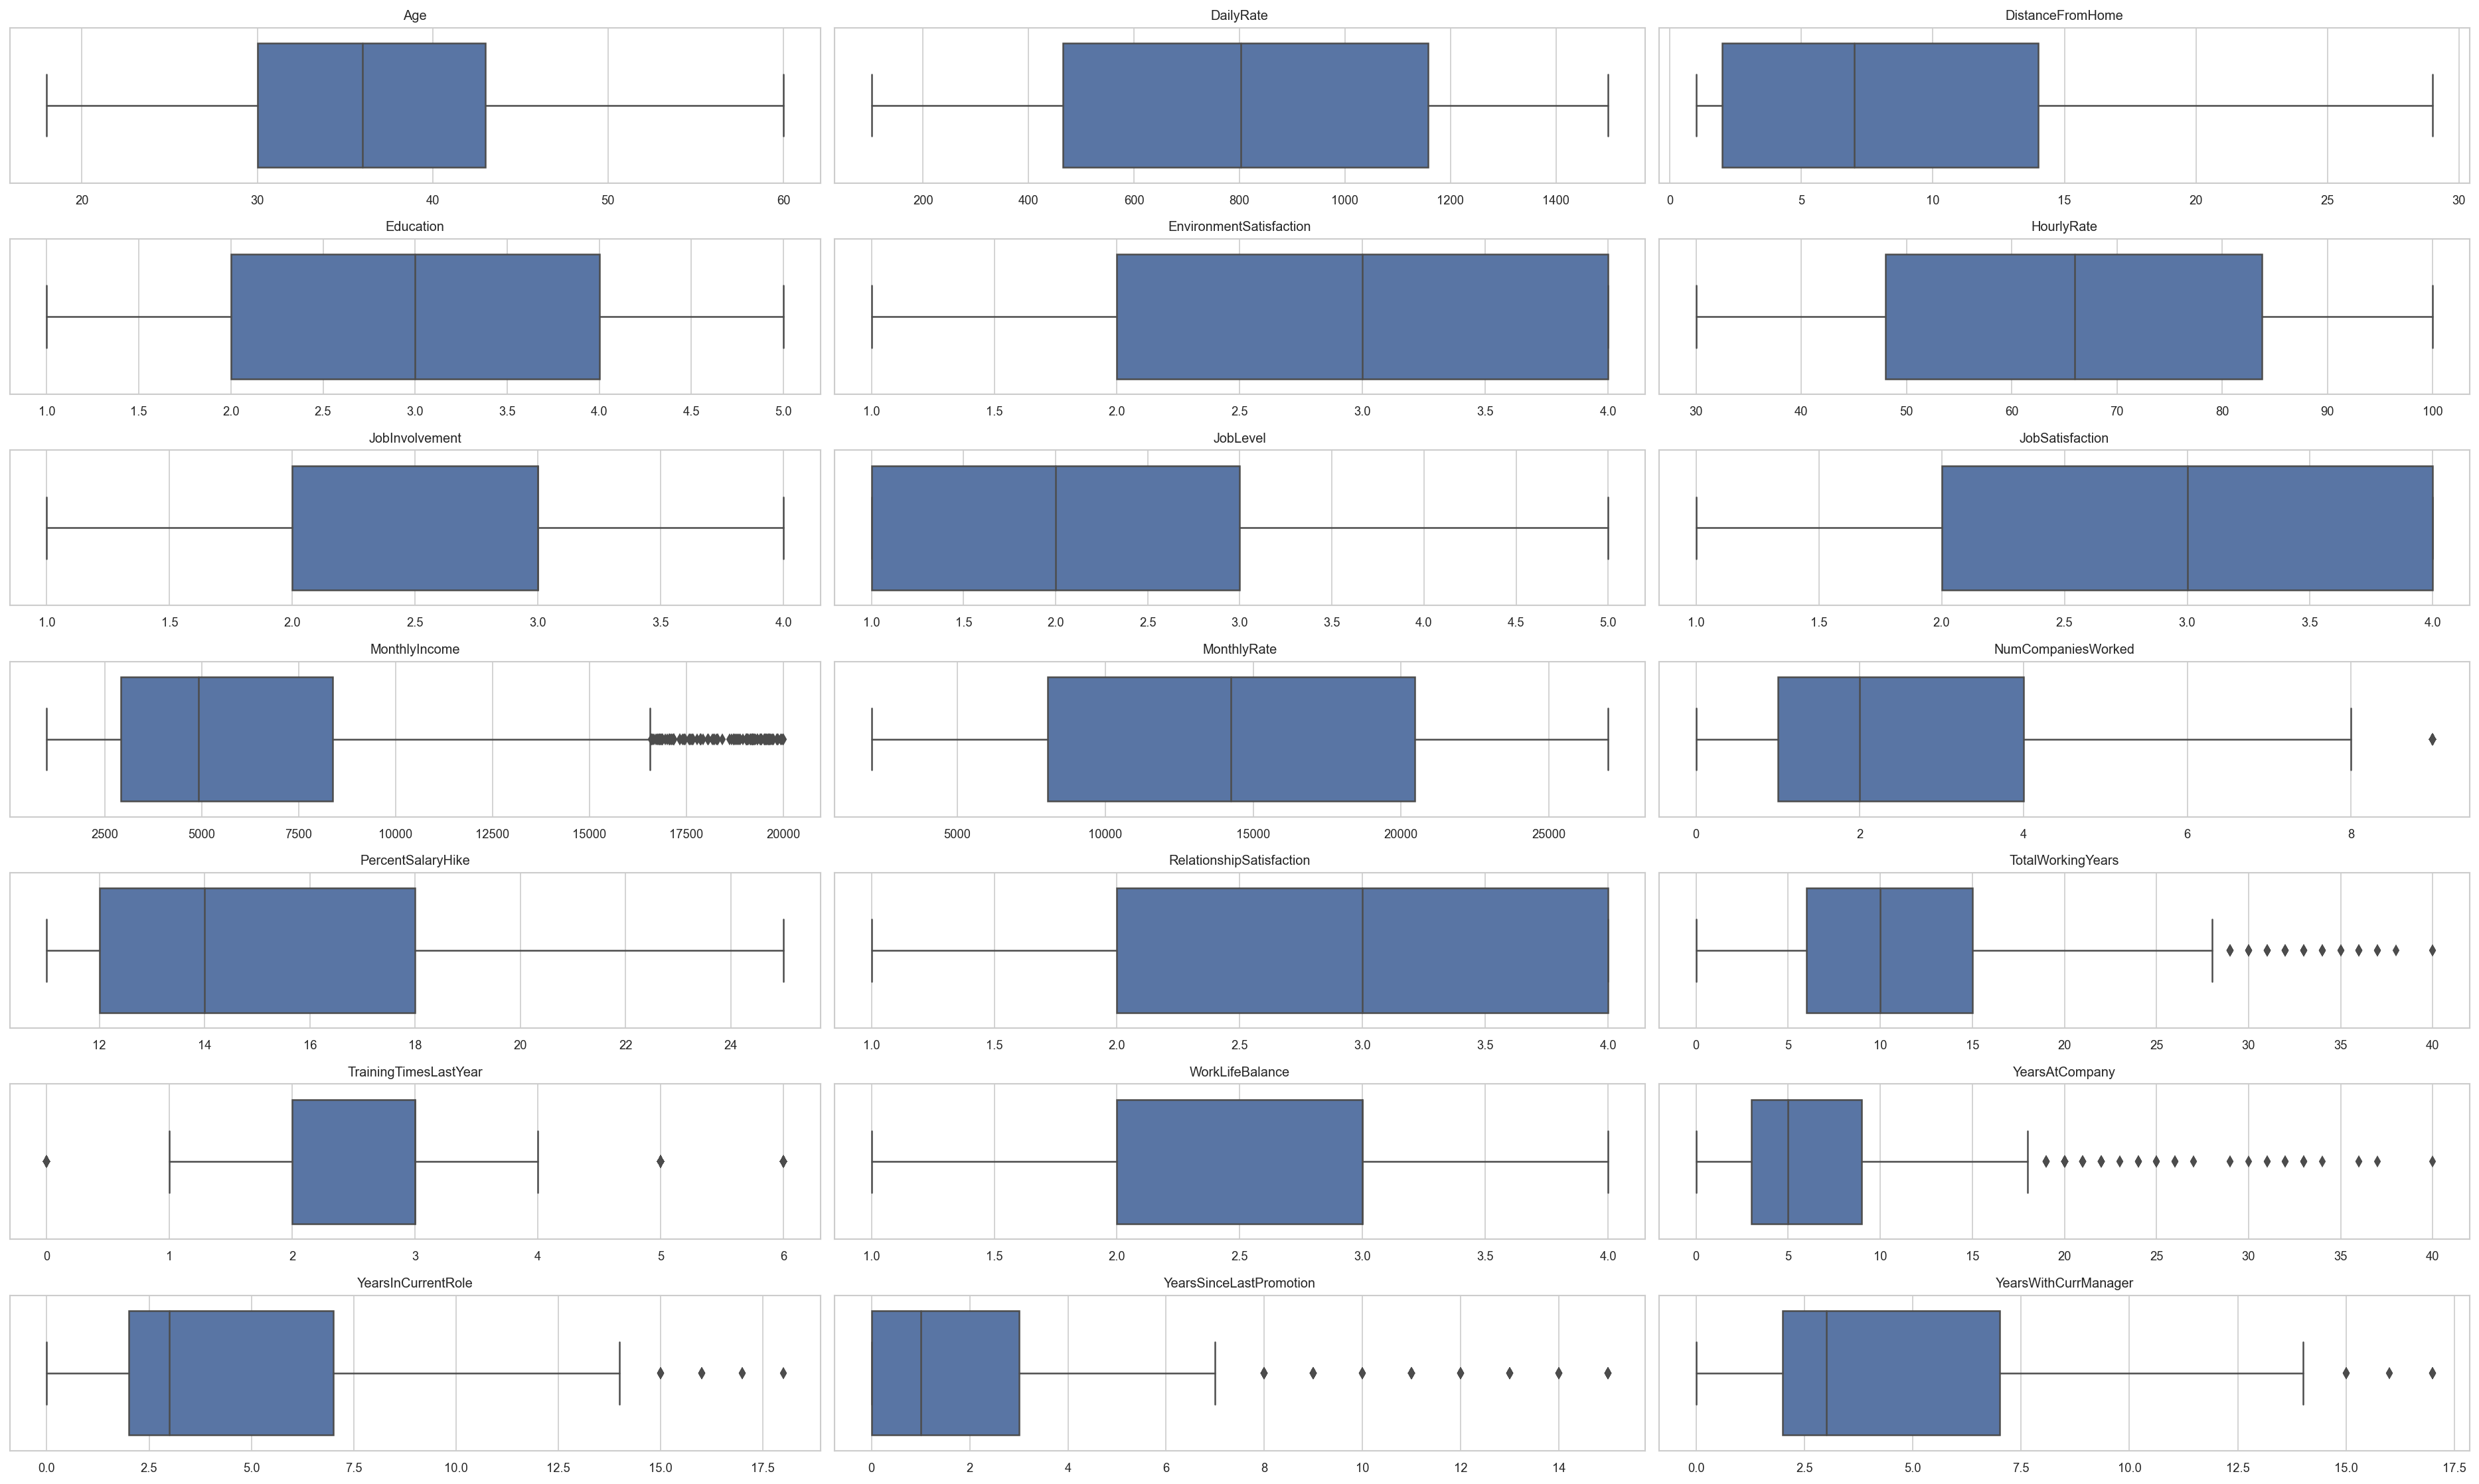

In [248]:
int_cols = att_df.select_dtypes(include=['int64']).columns

n_cols = 3
n_rows = (len(int_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25,15), dpi= 150)
axes = axes.flatten()

for i, col in enumerate(int_cols):
    sns.boxplot(x=att_df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove empty plots if number of columns is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [249]:
def detect_outliers(df): 
    for col in df.select_dtypes(include=['int64']).columns:
        # Calculating the Interquartile Range for the Monthly income
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        threshold = 1.5
        upper_bound = Q3 + threshold * IQR
        lower_bound = Q1 - threshold * IQR
        
        # identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
    return outliers

In [250]:
outliers_detected = detect_outliers(att_df)
outliers_detected.shape

(14, 31)

In [251]:
outliers_detected

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,Female,42,2,3,Healthcare Representative,4,Married,10248,2094,3,No,14,3,4,1,24,4,3,22,6,5,17
123,51,No,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,Male,51,3,5,Research Director,3,Single,19537,6462,7,No,13,3,3,0,23,5,3,20,18,15,15
153,45,No,Travel_Rarely,194,Research & Development,9,3,Life Sciences,2,Male,60,3,2,Laboratory Technician,2,Divorced,2348,10901,8,No,18,3,3,1,20,2,1,17,9,0,15
187,55,No,Travel_Rarely,692,Research & Development,14,4,Medical,3,Male,61,4,5,Research Director,2,Single,18722,13339,8,No,11,3,4,0,36,3,3,24,15,2,15
231,42,No,Travel_Rarely,532,Research & Development,4,2,Technical Degree,3,Male,58,3,5,Manager,4,Married,19232,4933,1,No,11,3,4,0,22,3,3,22,17,11,15
386,37,No,Travel_Rarely,1107,Research & Development,14,3,Life Sciences,4,Female,95,3,1,Laboratory Technician,1,Divorced,3034,26914,1,No,12,3,3,1,18,2,2,18,7,12,17
561,52,No,Travel_Rarely,621,Sales,3,4,Marketing,3,Male,31,2,4,Manager,1,Married,16856,10084,1,No,11,3,1,0,34,3,4,34,6,1,16
616,51,No,Travel_Rarely,1318,Sales,26,4,Marketing,1,Female,66,3,4,Manager,3,Married,16307,5594,2,No,14,3,3,1,29,2,2,20,6,4,17
635,35,No,Travel_Rarely,607,Research & Development,9,3,Life Sciences,4,Female,66,2,3,Manufacturing Director,3,Married,10685,23457,1,Yes,20,4,2,1,17,2,3,17,14,5,15
686,41,No,Travel_Rarely,263,Research & Development,6,3,Medical,4,Male,59,3,1,Laboratory Technician,1,Single,4721,3119,2,Yes,13,3,3,0,20,3,3,18,13,2,17


In [252]:
outlier_indices = outliers_detected.index
outlier_indices

Int64Index([28, 123, 153, 187, 231, 386, 561, 616, 635, 686, 875, 926, 1078,
            1348],
           dtype='int64')

In [253]:
att_df = att_df.drop(outlier_indices).reset_index(drop=True)
att_df.shape

(1456, 31)

### Encoding Categorical Values

All categorical values are converted to numerical values using Label Encoding, making the data suitable for machine learning algorithms

In [262]:
abel_encoder = LabelEncoder()

#Applying encoding to each column
for col in cat_cols:
    att_df[col] = label_encoder.fit_transform(att_df[col])
    
att_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,0,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,1,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,0,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,0,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,0,4,1,6,3,3,2,2,2,2


## Data Exploration

### Correlation between variables

In [292]:
corr_matrix = att_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

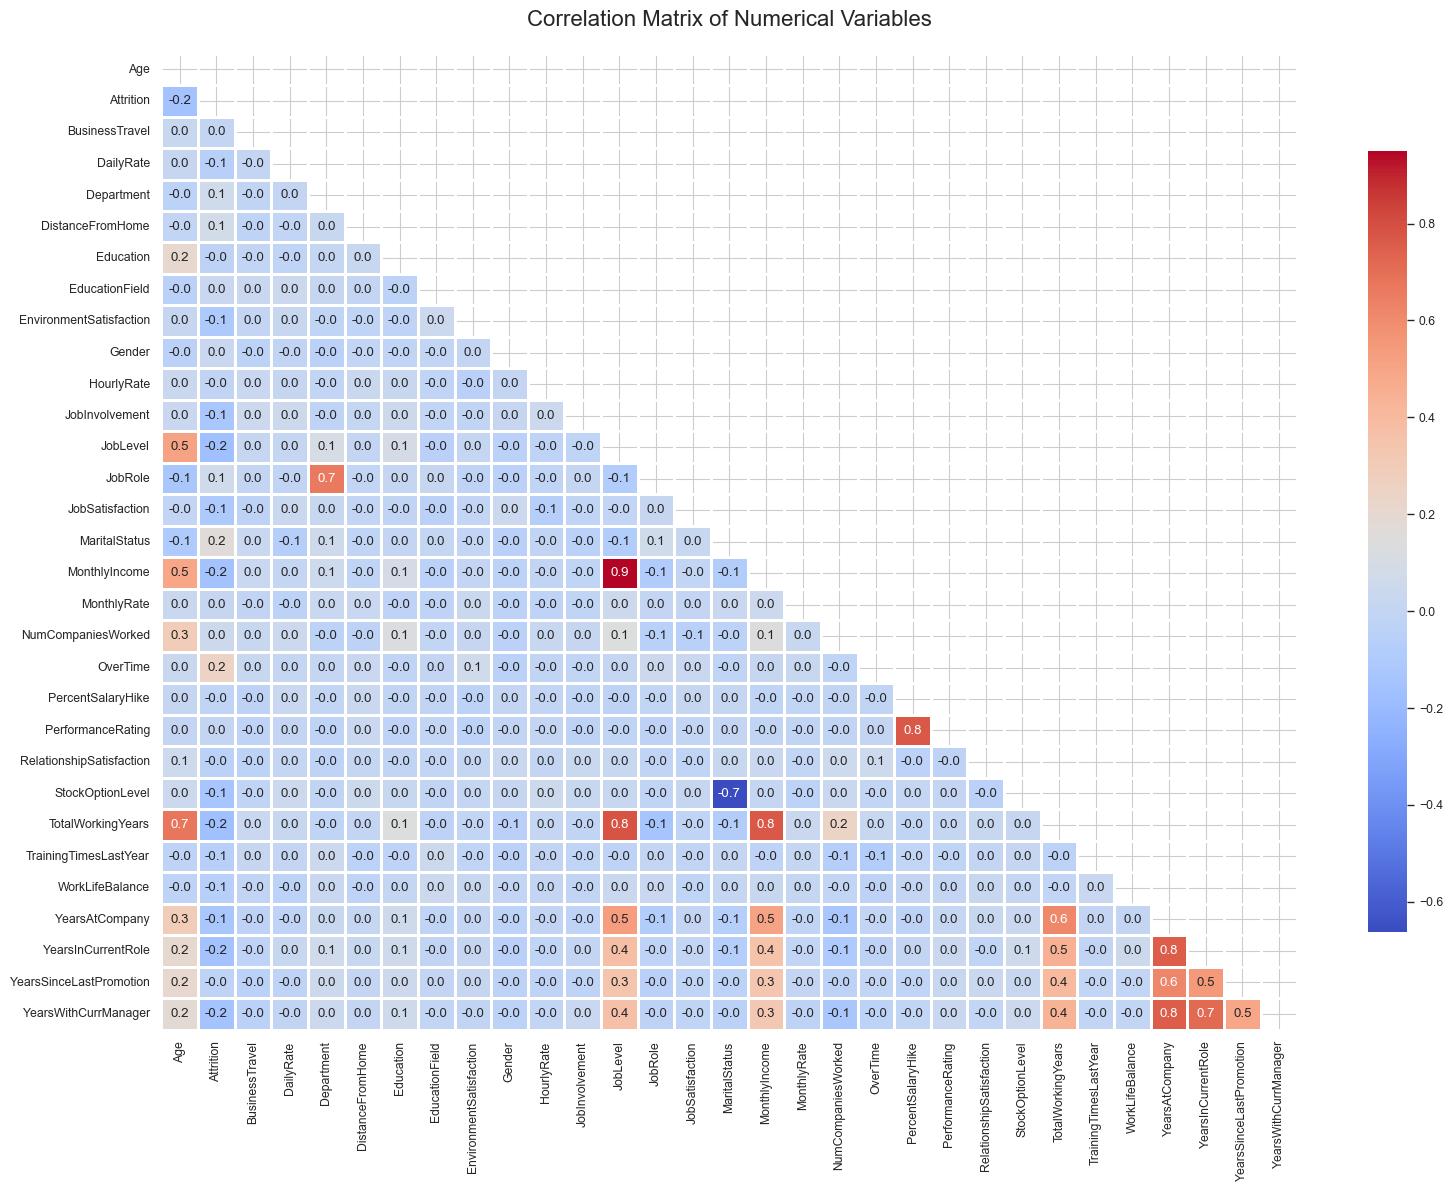

In [293]:
plt.figure(figsize=(16, 12))
sns.set_theme(style="whitegrid")
sns.set_context("paper")
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True, 
    fmt=".1f",
    cmap='coolwarm', 
    linewidths=.8,
    cbar_kws={"shrink": .8})

plt.title("Correlation Matrix of Numerical Variables", fontsize=16, pad=20)
plt.xticks(rotation=90) 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysis of correlation results

- The strongest correlation as expected is between Monthly income and Job Level (0.9)
- Total working years is also highly correlated with Job level and Monthly income (0.8)
- Years spent in the company is highly correlated with Years in the current role and Years with the current manager (0.8)
- Age is positively correlated with Total working years (0.7), Job level and Monthly income (0.5)
- Job role is positively correlated with the Department (0.7) 
- Marital Status is negatively correlated with Stock Option Level (-0.7)

Based on these results we can conclude that certain employees who are older have more working experience and are in senior positions. However most employees who have more experience and more seniority will definitely earn higher salaries.

### Univariate Analysis

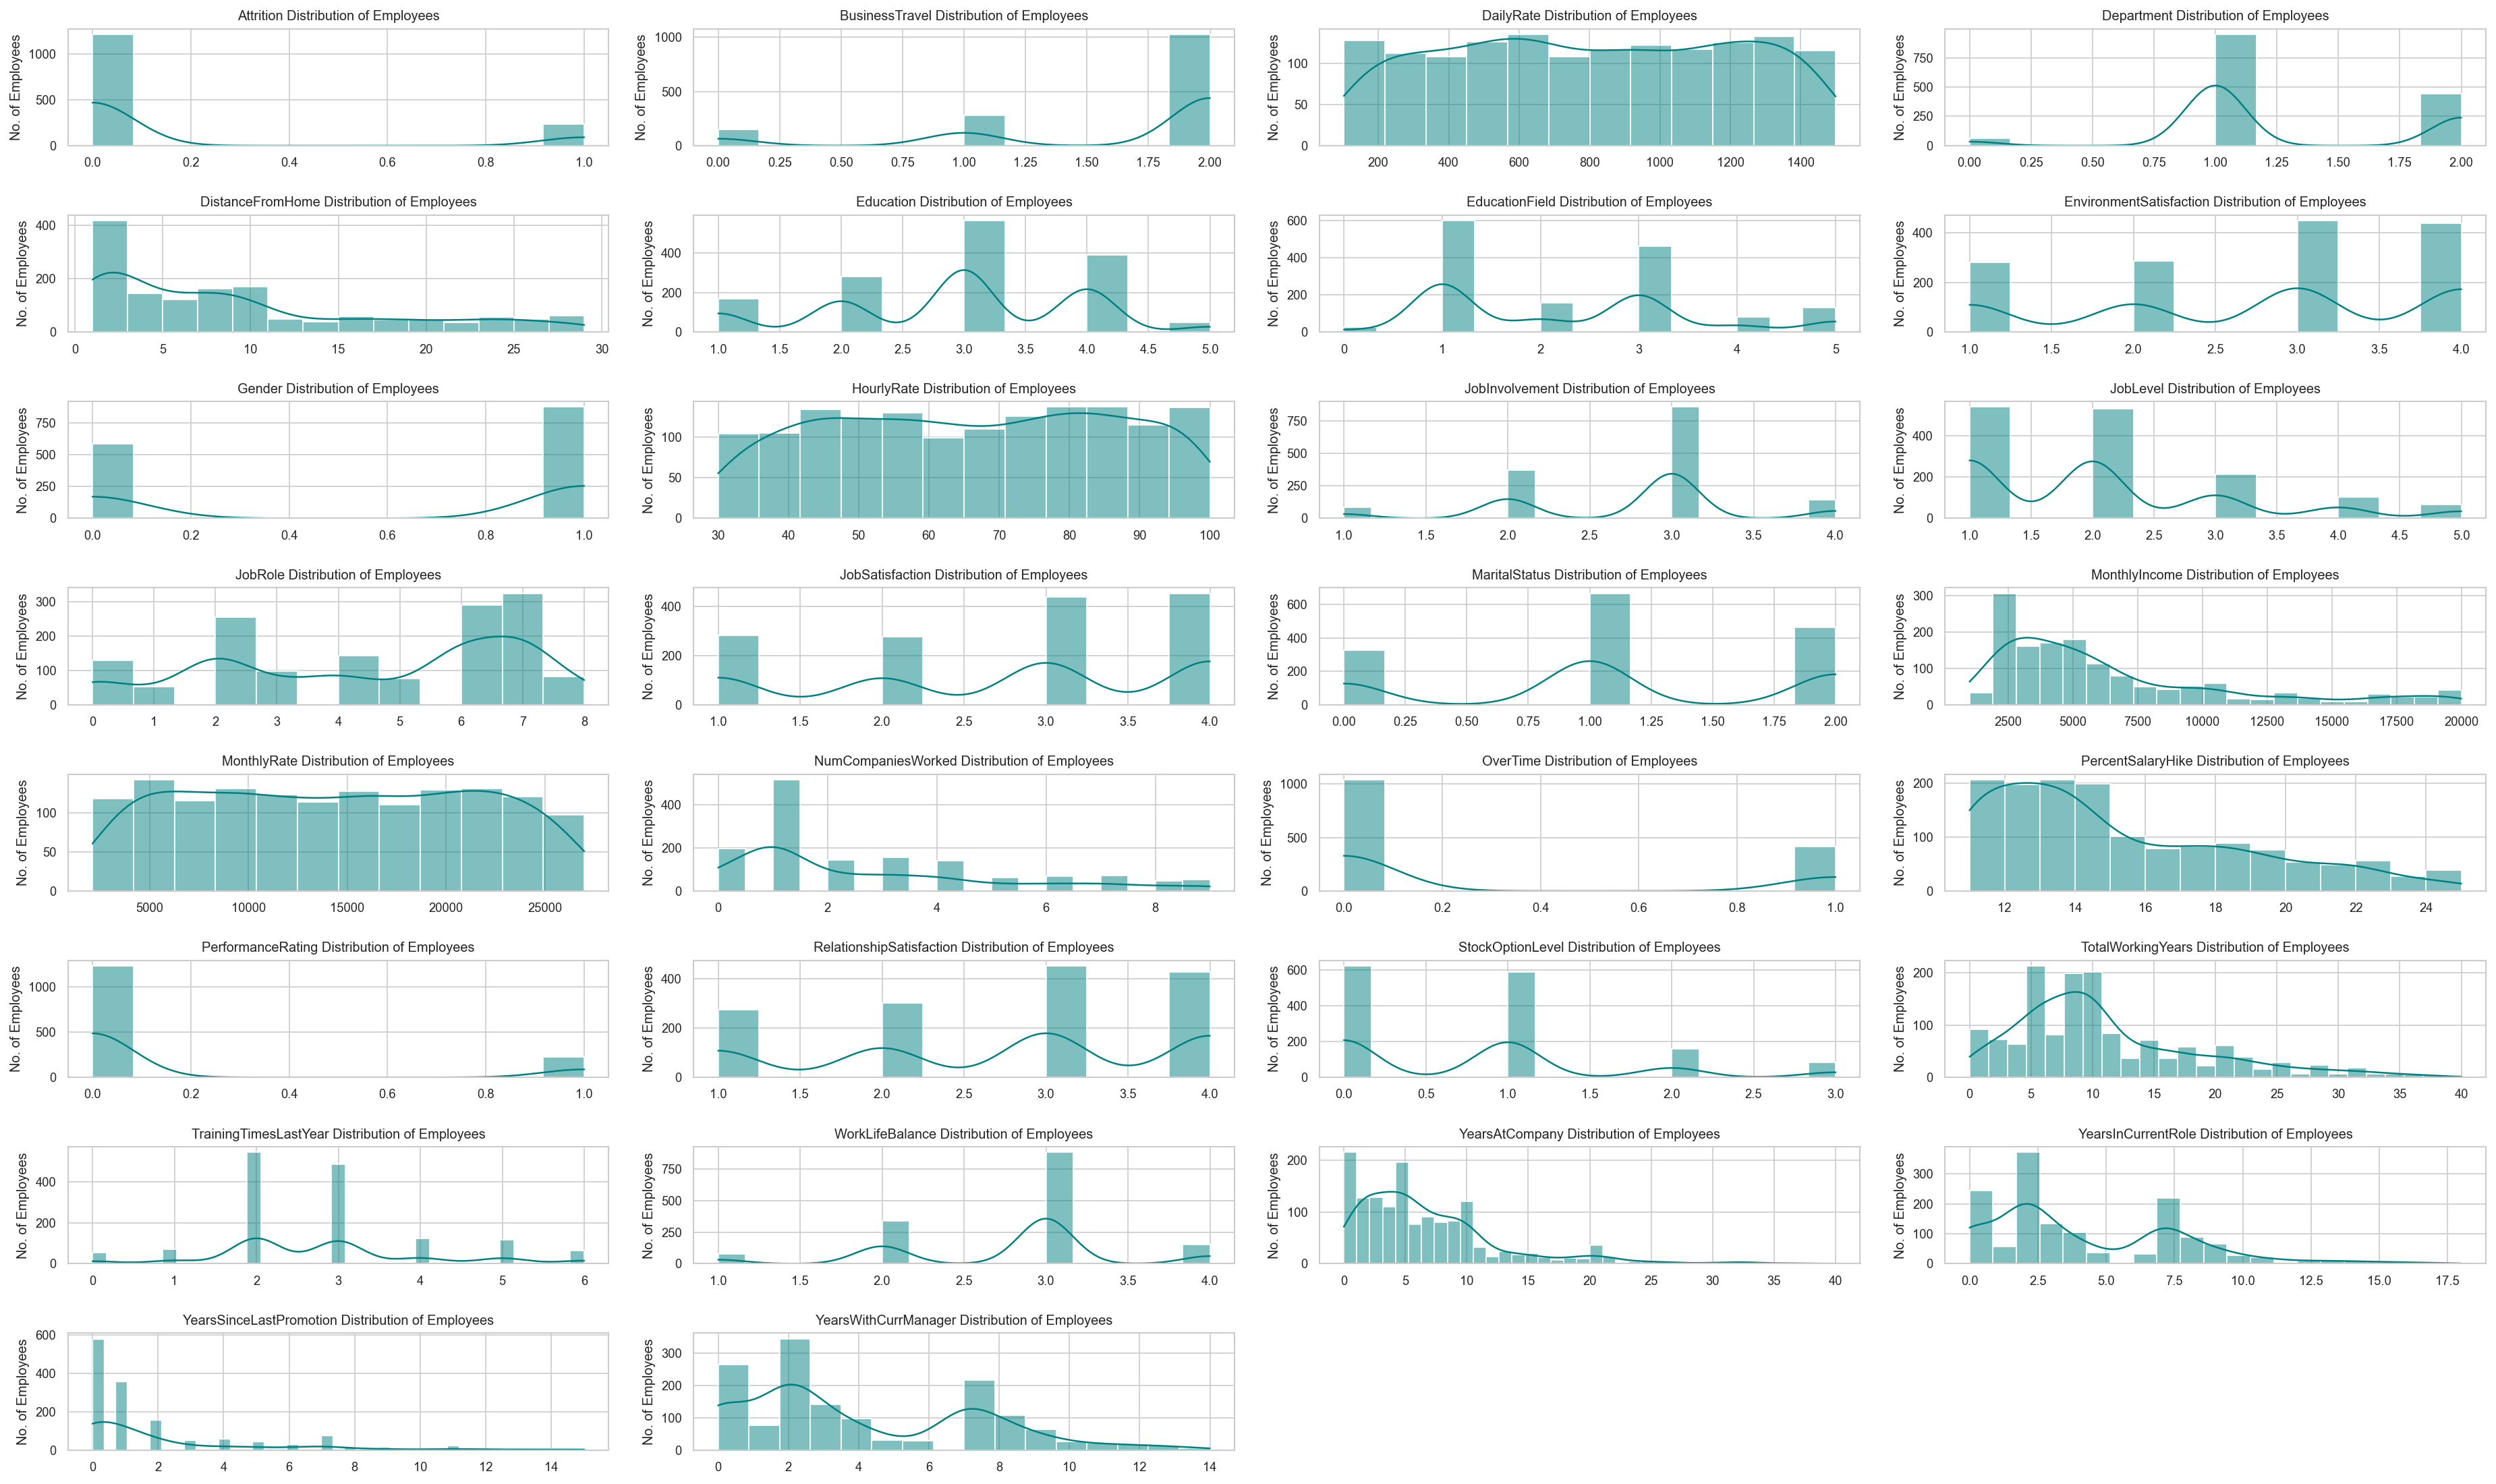

In [318]:
num_cols = att_df.select_dtypes('number').columns
n_cols = 4
n_rows = (len(num_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25,15), dpi= 150)
axes = axes.flatten()

for i, col in enumerate(num_cols[1:]):
    sns.histplot(att_df, x=col, kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'{col} Distribution of Employees')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('No. of Employees')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2)
plt.show()

### Age Distribution

In [256]:
avg_age = np.mean(att_df["Age"])
median_age = np.median(att_df["Age"])
print("Average Age: ", avg_age, "\nMedian Age: ", median_age)

Average Age:  36.85027472527472 
Median Age:  35.5


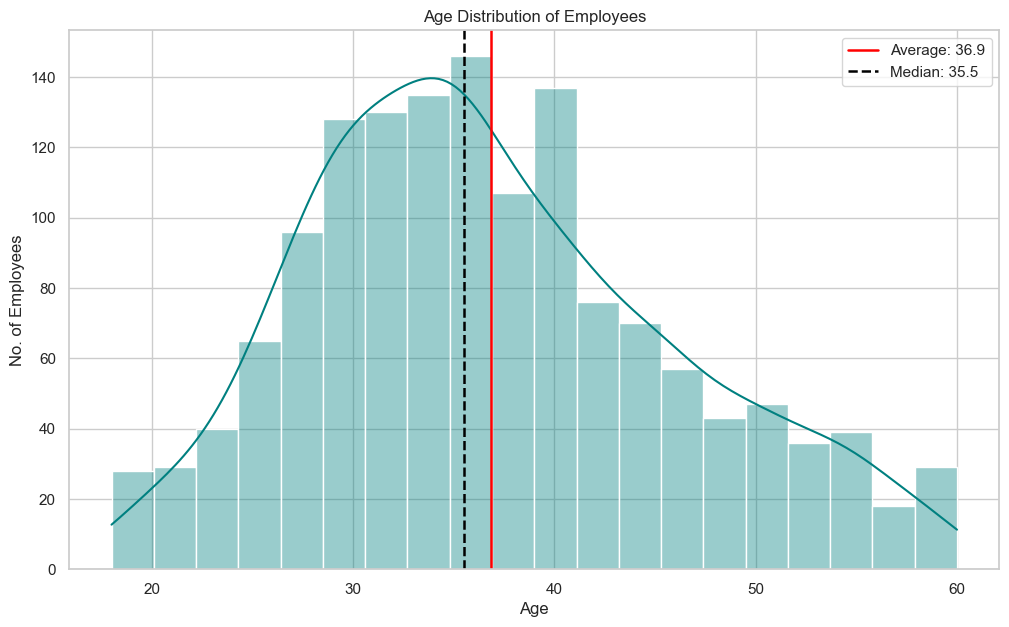

In [257]:
plt.figure(figsize=(12,7))
sns.set_theme(style = "whitegrid")

sns.histplot(data = att_df, x = "Age",bins = 20, kde=True, alpha=0.4, color="teal")
plt.axvline(avg_age, color="red",linestyle="-",linewidth="1.8", label=f"Average: {avg_age:.1f}")
plt.axvline(median_age, color="black",linestyle="--",linewidth="1.8", label=f"Median: {median_age:.1f}")
plt.legend()
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("No. of Employees")
plt.show()

### Employee Attrition Rate by Age

In [294]:
positive_attrition_df = att_df.loc[att_df['Attrition'] == 1]
negative_attrition_df = att_df.loc[att_df['Attrition'] == 0]

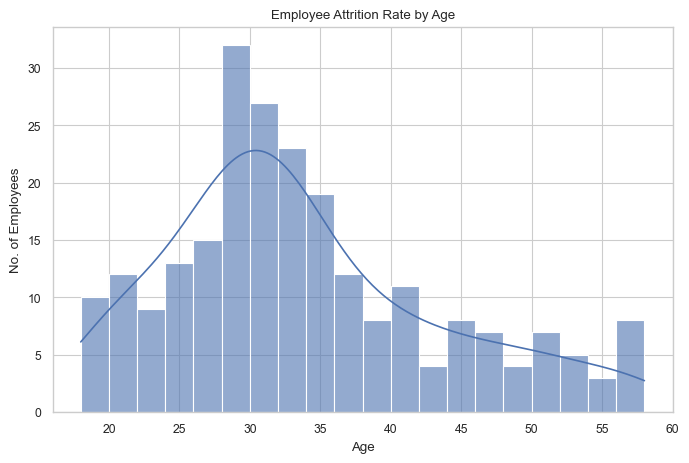

In [317]:
plt.figure(figsize=(8,5))
sns.set_theme(style = "whitegrid")
sns.set_context("paper")

sns.histplot(data = positive_attrition_df, x = "Age", kde=True, bins=20, alpha=0.6)
plt.title("Employee Attrition Rate by Age")
plt.xlabel("Age")
plt.ylabel("No. of Employees")
plt.show()

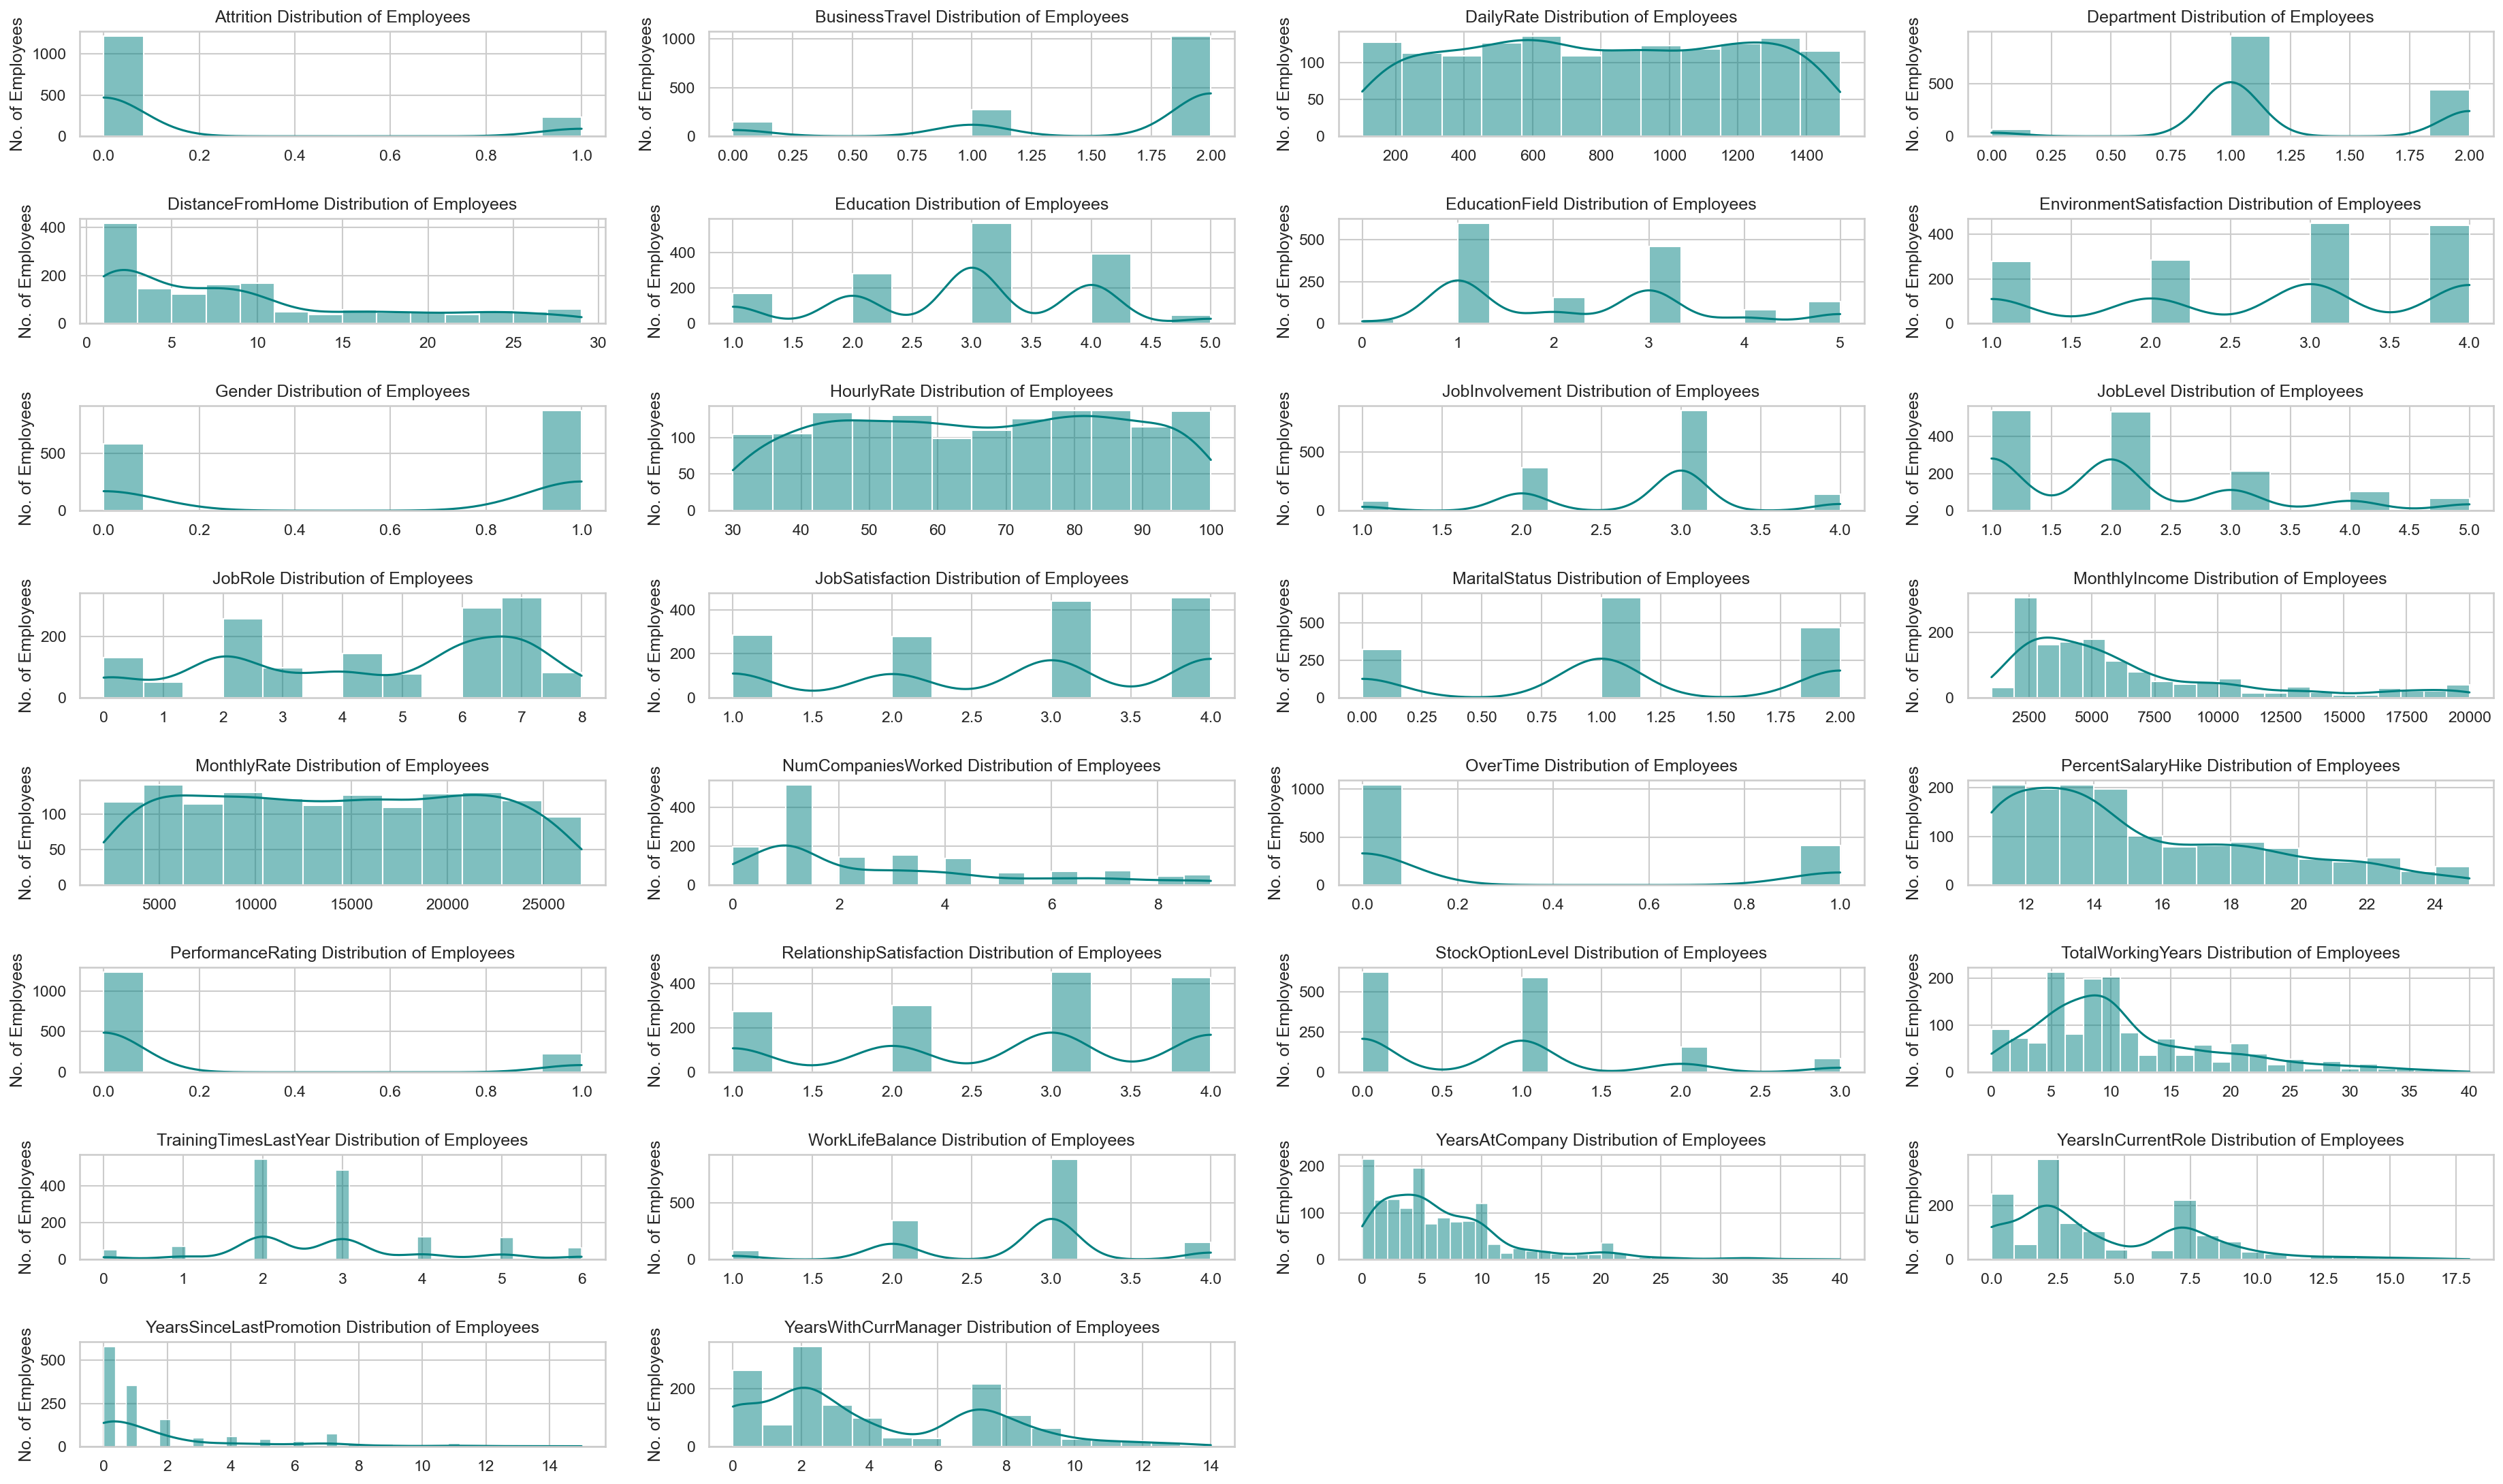

In [258]:
num_cols = att_df.select_dtypes('number').columns
n_cols = 4
n_rows = (len(num_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25,15), dpi= 150)
axes = axes.flatten()

for i, col in enumerate(num_cols[1:]):
    sns.histplot(att_df, x=col, kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'{col} Distribution of Employees')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('No. of Employees')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2)
plt.show()

- We're observing uniform distributions from DailyRate, HourlyRate, MonthlyRate which will most likely add noise to our model. The same goes for PerformanceRating which only has values between 3 and 4. Therefore they can be removed from our dataset.

In [85]:
att_df = att_df.drop(columns=['DailyRate', 'HourlyRate',
                              'MonthlyRate', 'PerformanceRating'])

- Similar to what we observed in our boxplots, we can see that MonthlyIncome, TotalWorkingYears and YearsAtCompany are right skewed and contain a notable number of outliers. Our next step will be to check their skewness.

In [86]:
num_cols = att_df.select_dtypes('number').columns
skewed = att_df[num_cols].skew().sort_values(ascending=False)
skewed[abs(skewed) > 1]

YearsSinceLastPromotion    1.998283
YearsAtCompany             1.816230
MonthlyIncome              1.391844
TotalWorkingYears          1.141738
JobLevel                   1.038429
NumCompaniesWorked         1.025729
dtype: float64

- YearsSinceLastPromotion, YearsAtCompany and MonthlyIncome are observed for being highly skewed. This could be because the dataset has a large number of new recruits who have only recently started working at the company or even just recently joined the workforce and therefore have a lower salary.

#### Categorical Columns (Business Travel, Department, Education Field, Gender, Marital Status, Over Time)

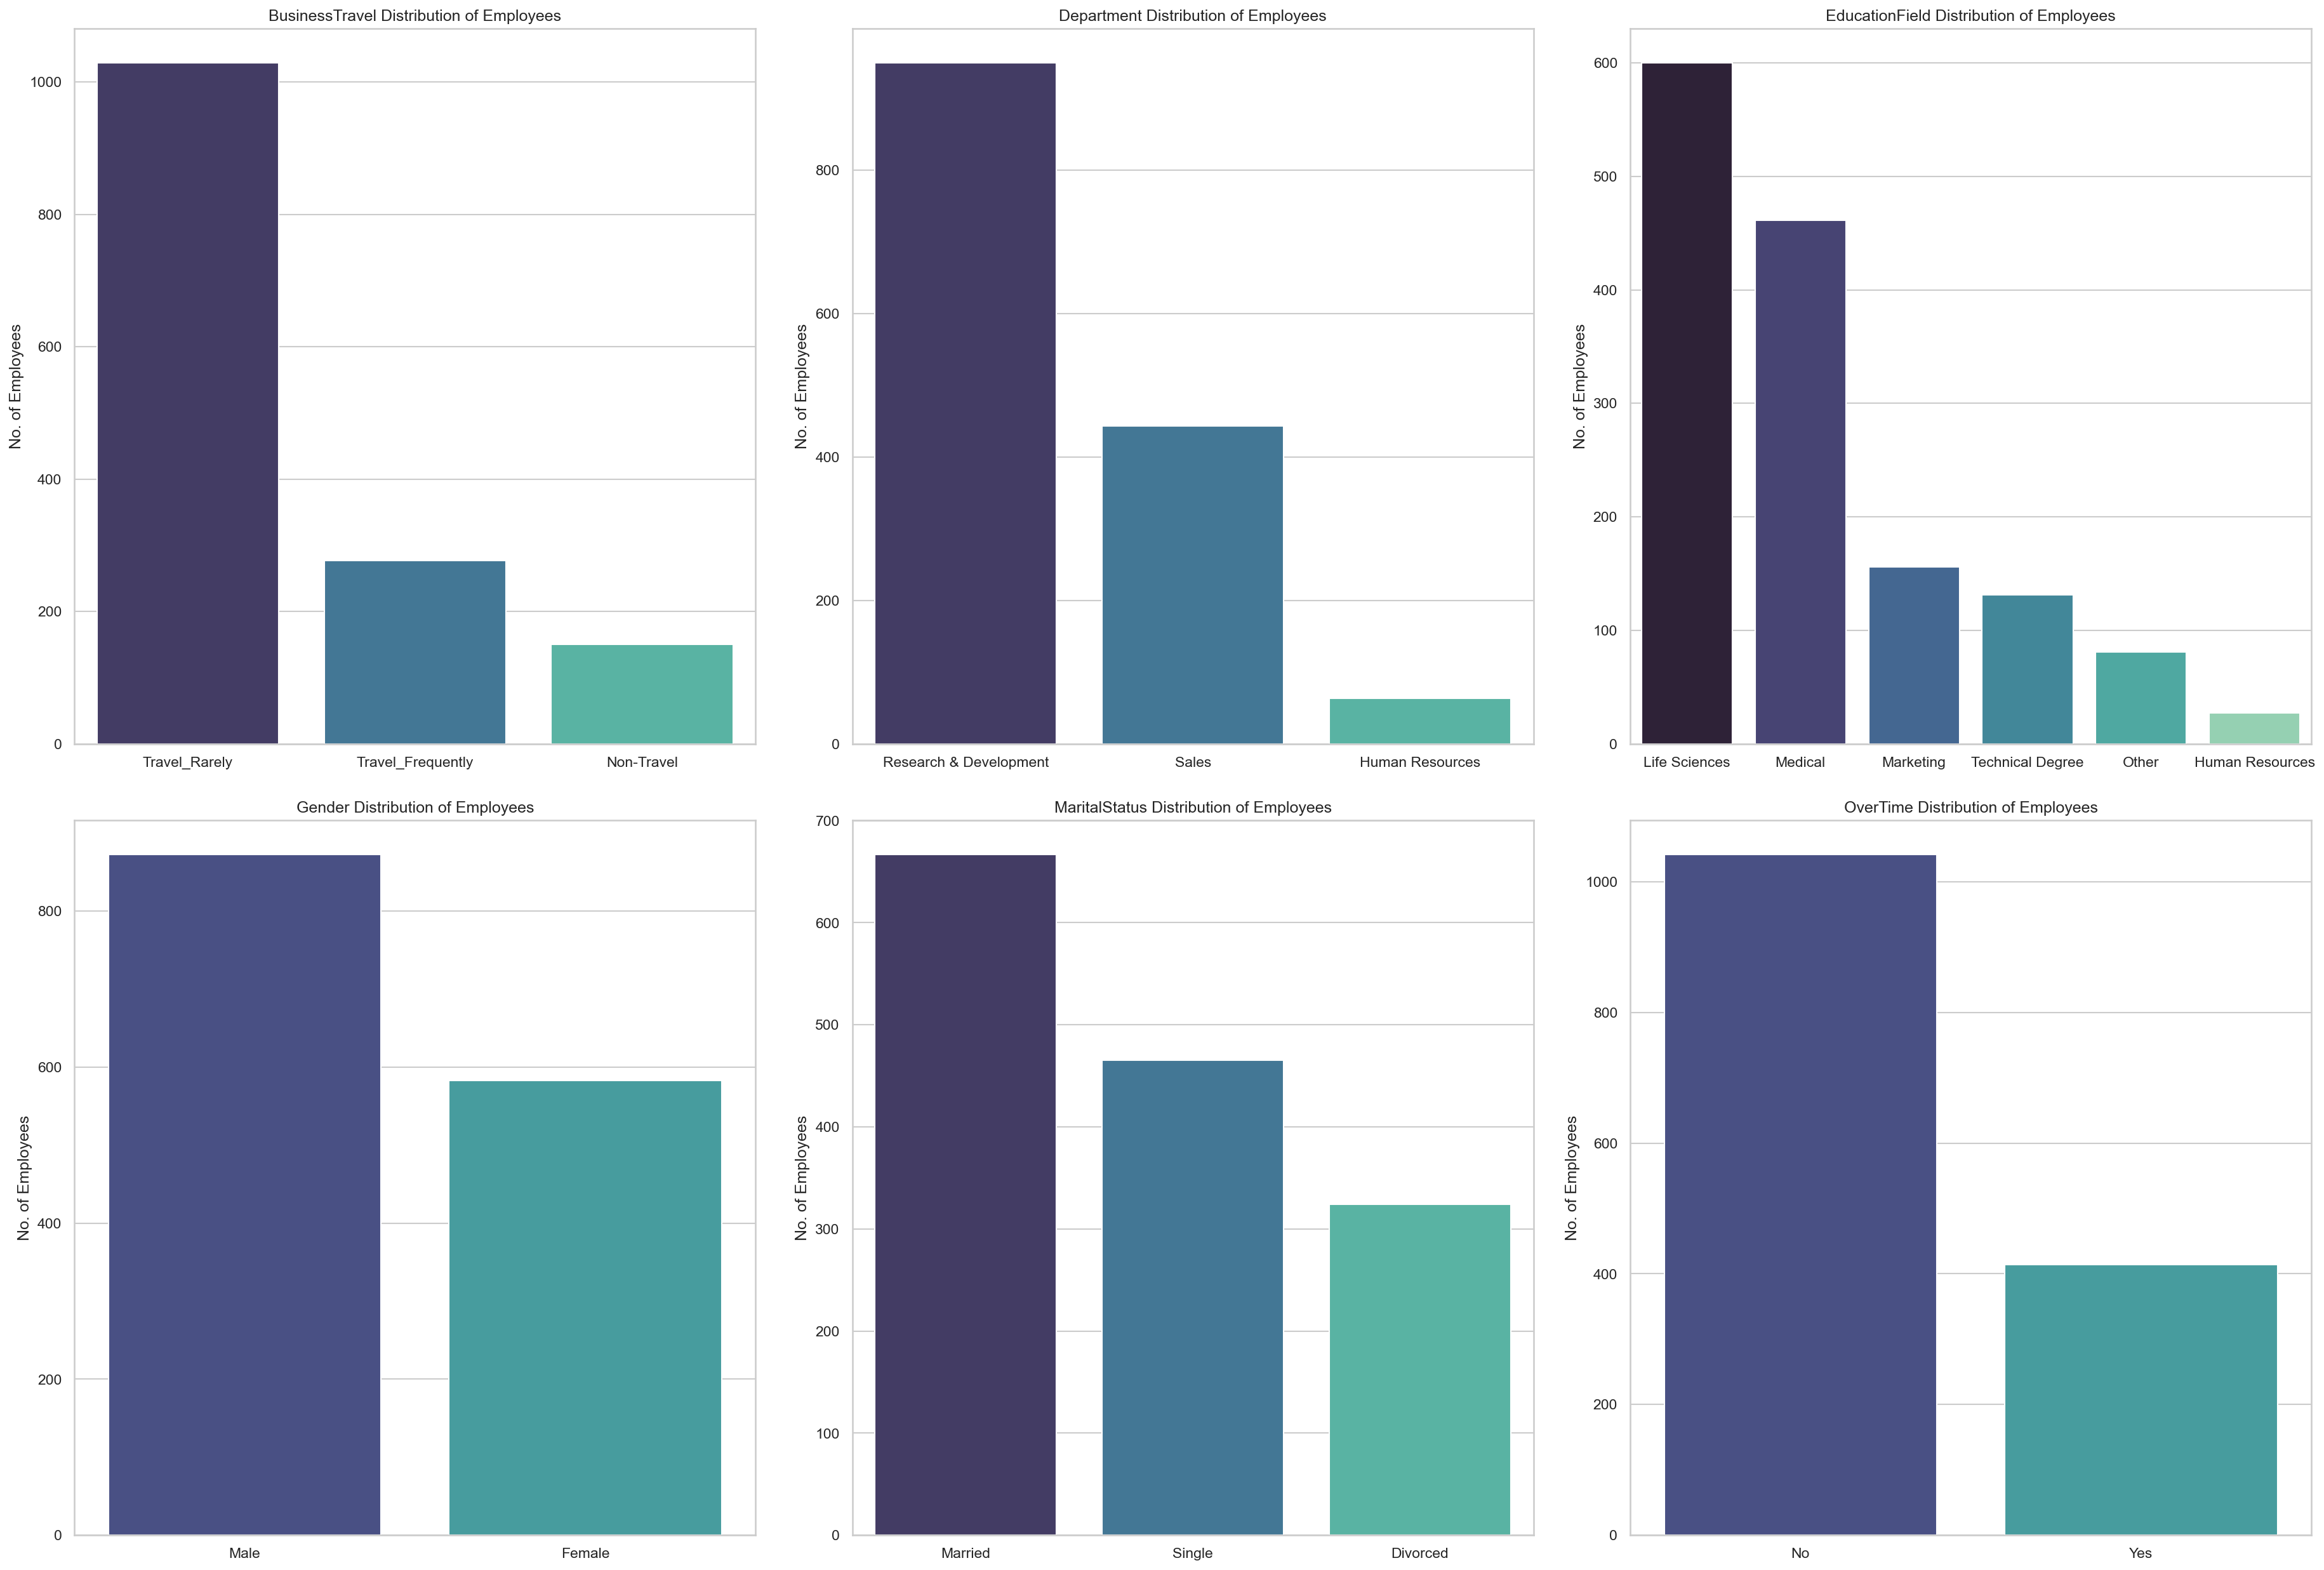

In [307]:
n_cols = 3
n_rows = (len(cat_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25,25), dpi= 150)
axes = axes.flatten()

for i, col in enumerate(cat_cols[1:7]):
    sns.countplot(x=att_df[col], ax=axes[i], order=att_df[col].value_counts().index, palette="mako")
    axes[i].set_title(f'{col} Distribution of Employees')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('No. of Employees')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2)
plt.show()

#### Job Role 

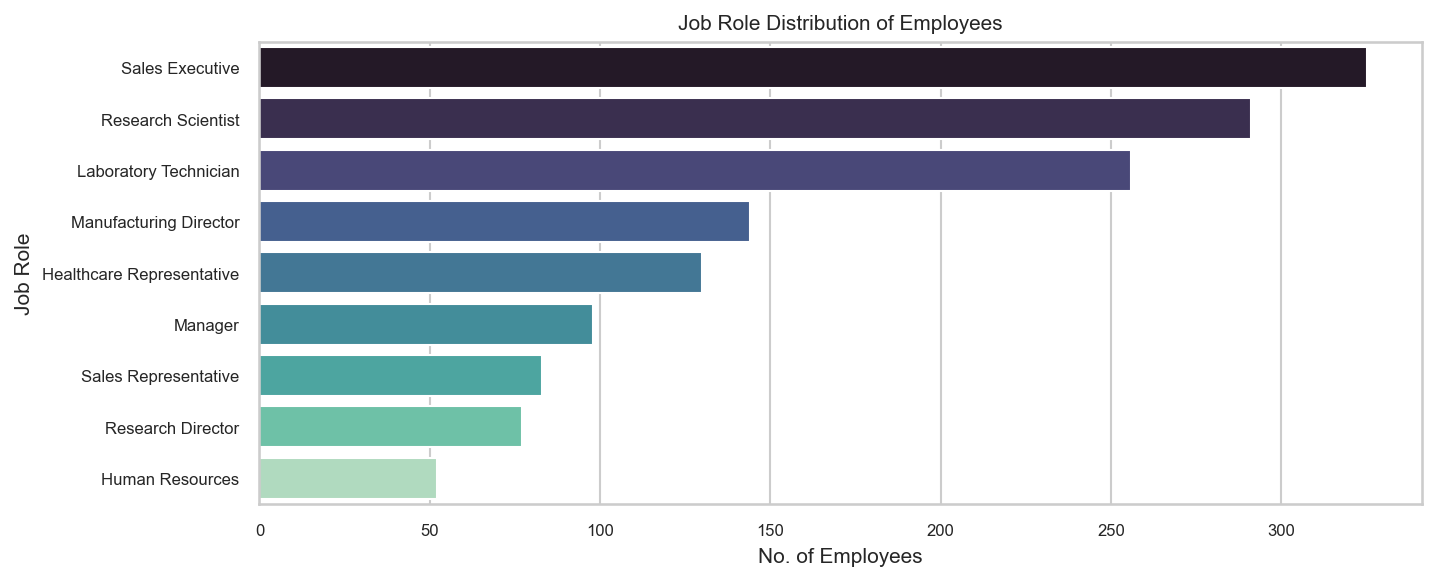

In [294]:
plt.figure(figsize=(10,4), dpi= 150)
sns.set_theme(style = "whitegrid")

sns.countplot(y=att_df['JobRole'], order=att_df['JobRole'].value_counts().index, palette="mako")
plt.title("Job Role Distribution of Employees", fontsize=10)
plt.ylabel("Job Role", fontsize=10)
plt.xlabel("No. of Employees", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Bivariate Analysis

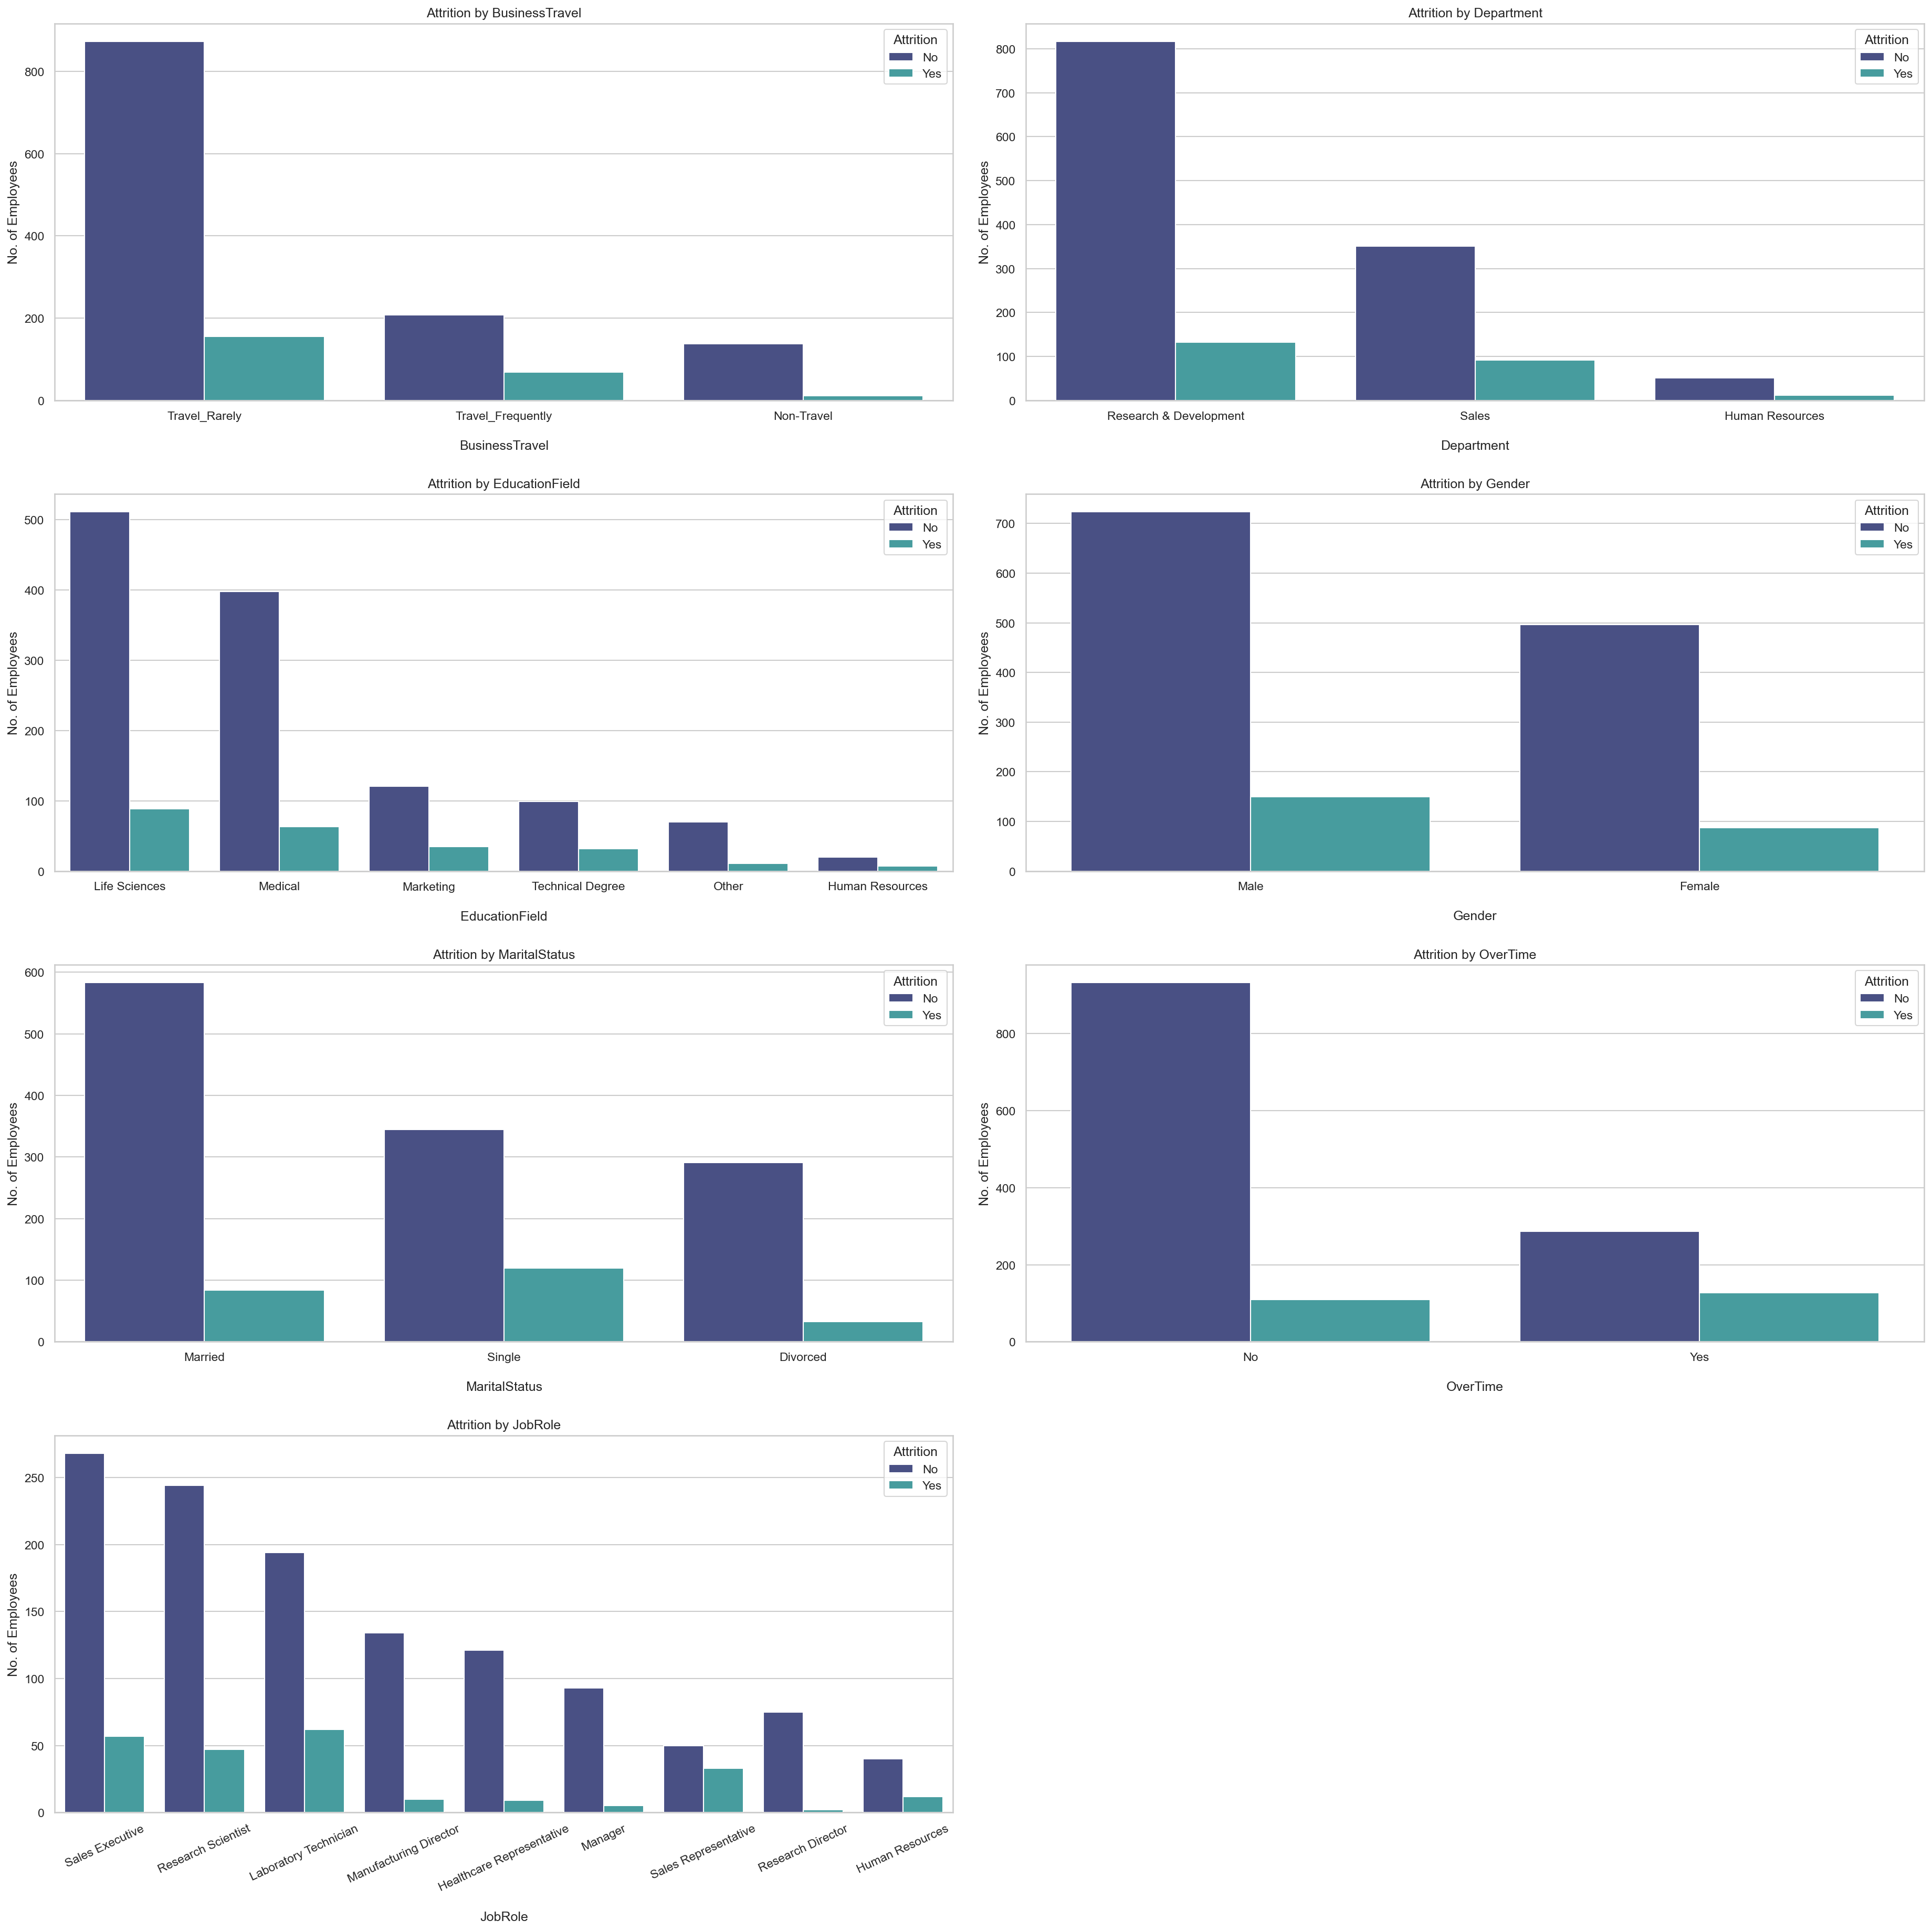

In [331]:
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25,25), dpi= 150)
axes = axes.flatten()

for i, col in enumerate(cat_cols[1:]):
    cp=sns.countplot(x=att_df[col],order=att_df[col].value_counts().index, ax=axes[i], hue=att_df['Attrition'], palette="mako")
    axes[i].set_title(f'Attrition by {col}')
    axes[i].set_xlabel(f'\n{col}')
    axes[i].set_ylabel('No. of Employees')
    if col == 'JobRole':
        axes[i].set_xticks(axes[i].get_xticks())
        axes[i].tick_params(axis='x', rotation=25)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2)
plt.show()

### Attrition Percentage by Department

In [18]:
dept_attrition = (att_df.groupby(['Department', 'Attrition'])
                  .size()
                  .reset_index(name='Count'))

In [23]:
dept_attrition['Percentage'] = (dept_attrition.groupby('Department', group_keys=True)['Count']
                                .apply(lambda x: 100*x /x.sum())
                                .reset_index(drop=True))

In [24]:
dept_attrition

,Department,Attrition,Count,Percentage
0,Human Resources,No,51,80.952381
1,Human Resources,Yes,12,19.047619
2,Research & Development,No,828,86.160250
3,Research & Development,Yes,133,13.839750
4,Sales,No,354,79.372197
5,Sales,Yes,92,20.627803


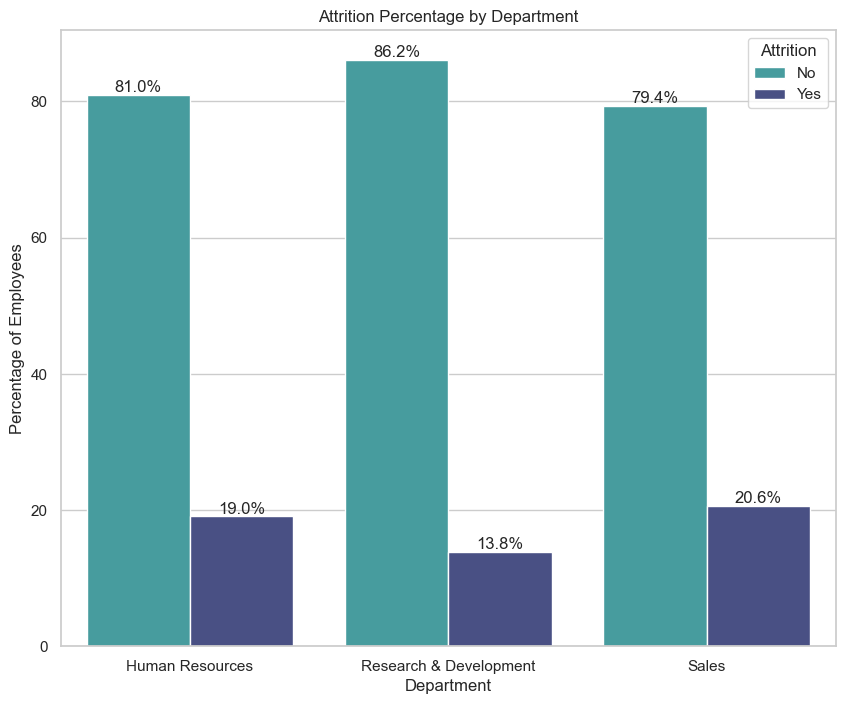

In [63]:
plt.figure(figsize=(10,8))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(data=dept_attrition,x='Department', y='Percentage', hue='Attrition',palette = "mako_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%' ,fontsize=12)
plt.title("Attrition Percentage by Department")
plt.xlabel("Department",fontsize=12)
plt.ylabel("Percentage of Employees",fontsize=12)
plt.show()

<ul><li>Human Resources and Sales have the highest percentage of attrition at 19%-20%. </li>
    <li>Although Research & Development has the higher number of employees, only 13.8% have left the company  </li>
</ul>

### Gender

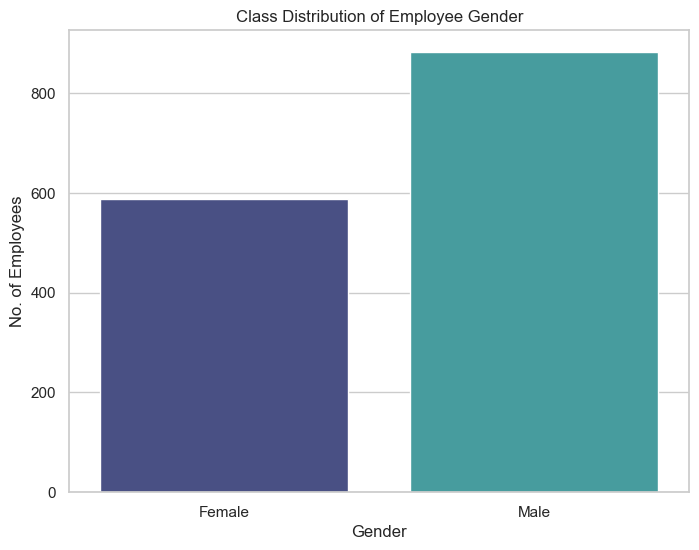

In [110]:
plt.figure(figsize=(8,6))
sns.set_theme(style = "whitegrid")

sns.countplot(x="Gender" ,palette = "mako", data=att_df)
plt.title("Class Distribution of Employee Gender")
plt.xlabel("Gender")
plt.ylabel("No. of Employees")
plt.show()

In [64]:
gend_attrition = (att_df.groupby(['Gender', 'Attrition'])
                  .size()
                  .reset_index(name='Count'))

In [65]:
gend_attrition['Percentage'] = (gend_attrition.groupby('Gender', group_keys=True)['Count']
                                .apply(lambda x: 100*x /x.sum())
                                .reset_index(drop=True))

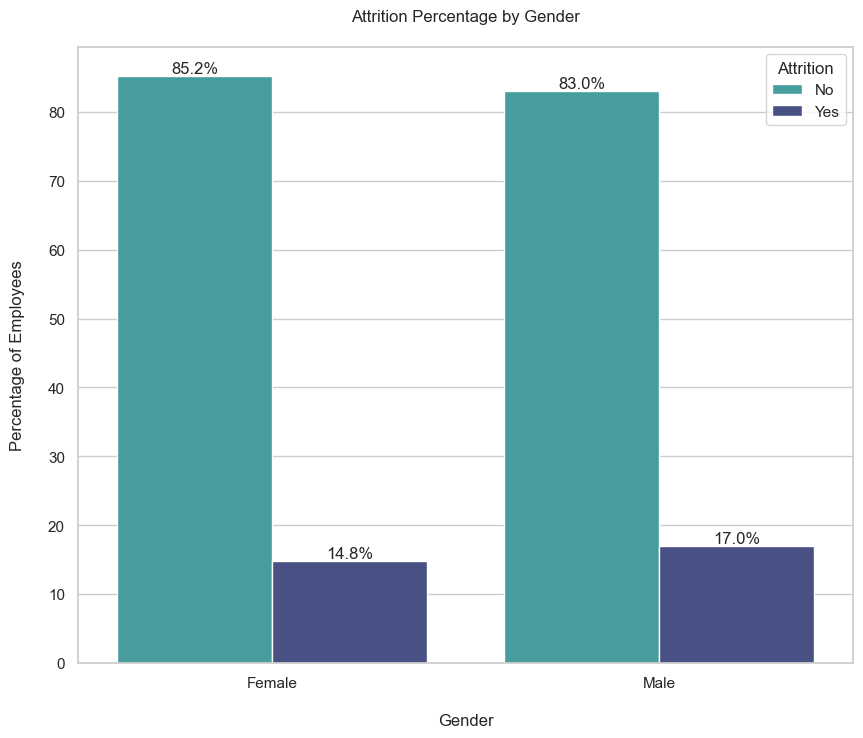

In [76]:
plt.figure(figsize=(10,8))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(data=gend_attrition,x='Gender', y='Percentage', hue='Attrition',palette = "mako_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%' ,fontsize=12)
plt.title("Attrition Percentage by Gender\n")
plt.xlabel("\nGender",fontsize=12)
plt.ylabel("Percentage of Employees\n",fontsize=12)
plt.show()

### Job Satisfaction

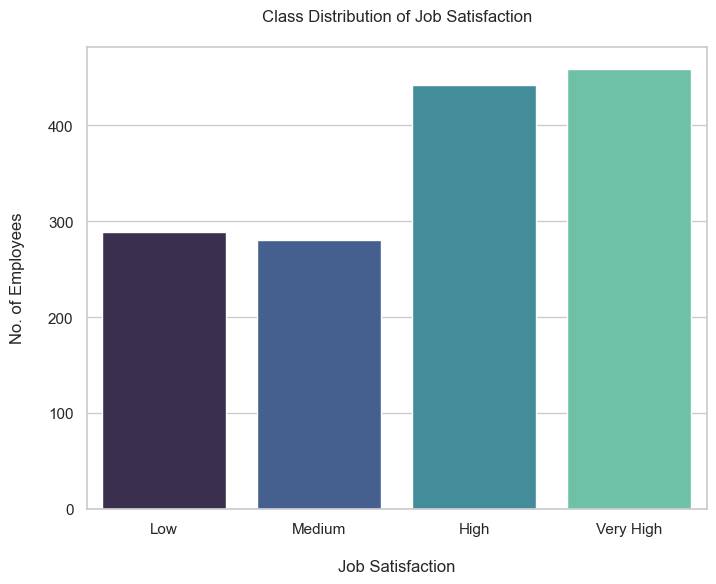

In [98]:
plt.figure(figsize=(8,6))
sns.set_theme(style = "whitegrid")

ax = sns.countplot(x="JobSatisfaction" ,palette = "mako", data=att_df)
for container in cp.containers:
    ax.set_xticklabels(["Low", "Medium", "High", "Very High"])

plt.title("Class Distribution of Job Satisfaction\n")
plt.xlabel("\nJob Satisfaction")
plt.ylabel("No. of Employees\n")
plt.show()

In [100]:
jobsat_attrition = (att_df.groupby(['JobSatisfaction', 'Attrition'])
                  .size()
                  .reset_index(name='Count'))

jobsat_attrition['Percentage'] = (jobsat_attrition.groupby('JobSatisfaction', group_keys=True)['Count']
                                .apply(lambda x: 100*x /x.sum())
                                .reset_index(drop=True))

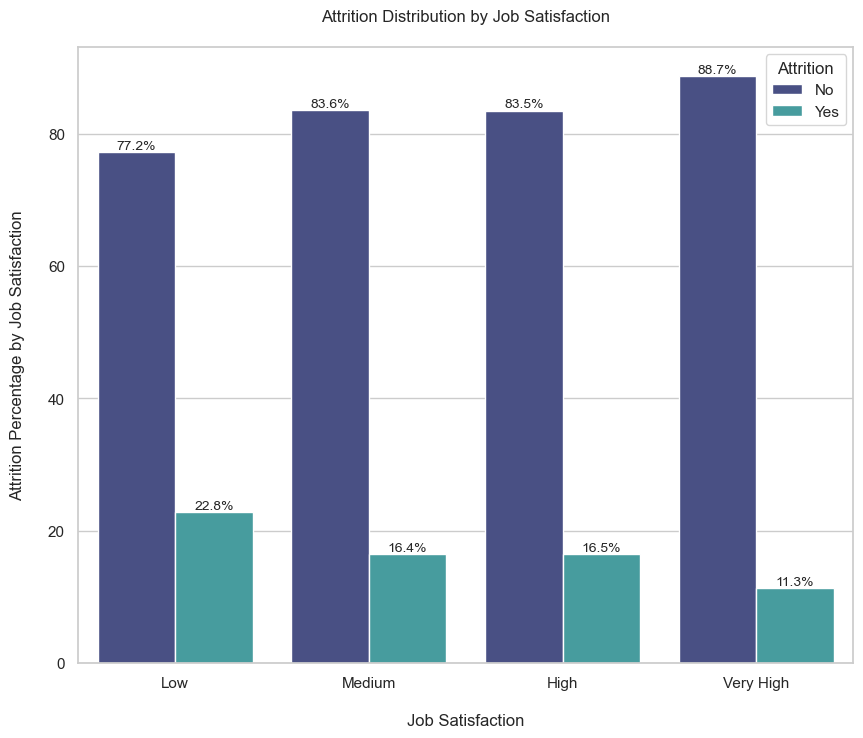

In [110]:
plt.figure(figsize=(10,8))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(data=jobsat_attrition,x='JobSatisfaction', y='Percentage', hue='Attrition',palette = "mako")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10)
    ax.set_xticklabels(["Low", "Medium", "High", "Very High"])

plt.title("Attrition Distribution by Job Satisfaction\n")
plt.xlabel("\nJob Satisfaction",fontsize=12)
plt.ylabel("Attrition Percentage by Job Satisfaction\n",fontsize=12)
plt.show()

### Environmental Satisfaction

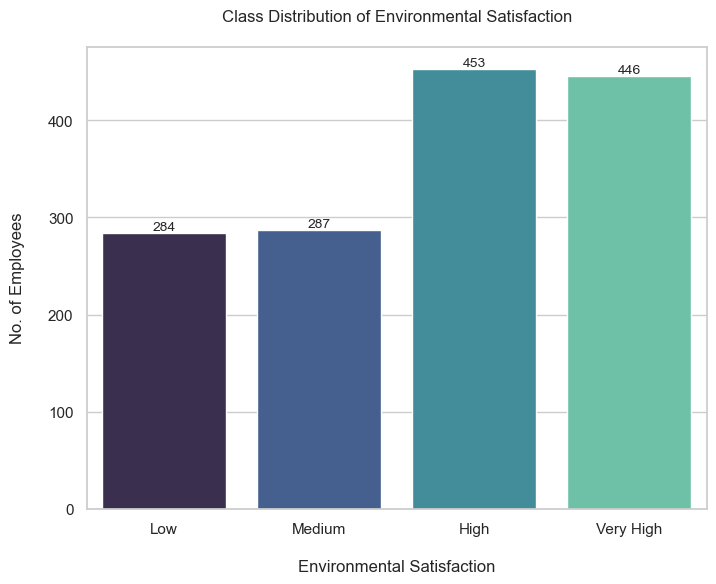

In [73]:
plt.figure(figsize=(8,6))
sns.set_theme(style = "whitegrid")

ax = sns.countplot(x="EnvironmentSatisfaction" ,palette = "mako", data=att_df)
for container in cp.containers:
    ax.bar_label(container,fontsize=10)
    ax.set_xticklabels(["Low", "Medium", "High", "Very High"])

plt.title("Class Distribution of Environmental Satisfaction\n")
plt.xlabel("\nEnvironmental Satisfaction")
plt.ylabel("No. of Employees\n")
plt.show()

In [79]:
env_attrition = (att_df.groupby(['EnvironmentSatisfaction', 'Attrition'])
                  .size()
                  .reset_index(name='Count'))

env_attrition['Percentage'] = (env_attrition.groupby('EnvironmentSatisfaction', group_keys=True)['Count']
                                .apply(lambda x: 100*x /x.sum())
                                .reset_index(drop=True))

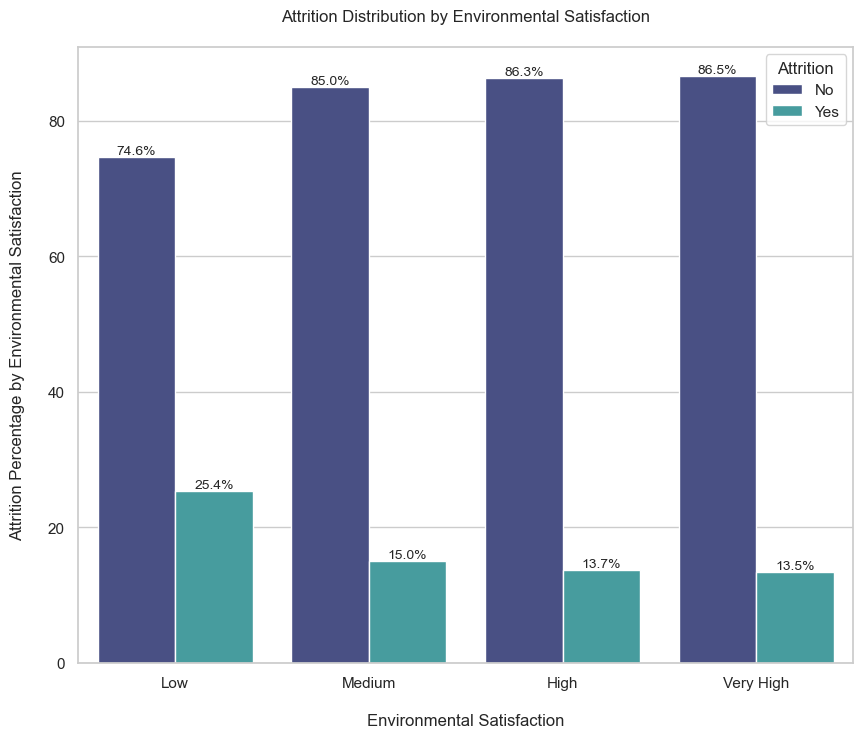

In [89]:
plt.figure(figsize=(10,8))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(data=env_attrition,x='EnvironmentSatisfaction', y='Percentage', hue='Attrition',palette = "mako")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10)
    ax.set_xticklabels(["Low", "Medium", "High", "Very High"])

plt.title("Attrition Distribution by Environmental Satisfaction\n")
plt.xlabel("\nEnvironmental Satisfaction",fontsize=12)
plt.ylabel("Attrition Percentage by Environmental Satisfaction\n",fontsize=12)
plt.show()

<ul><li>As expected when environmental satisaction is low the attrition rate is at its highest (25%) with medium coming in second at 15%</li>
</ul>

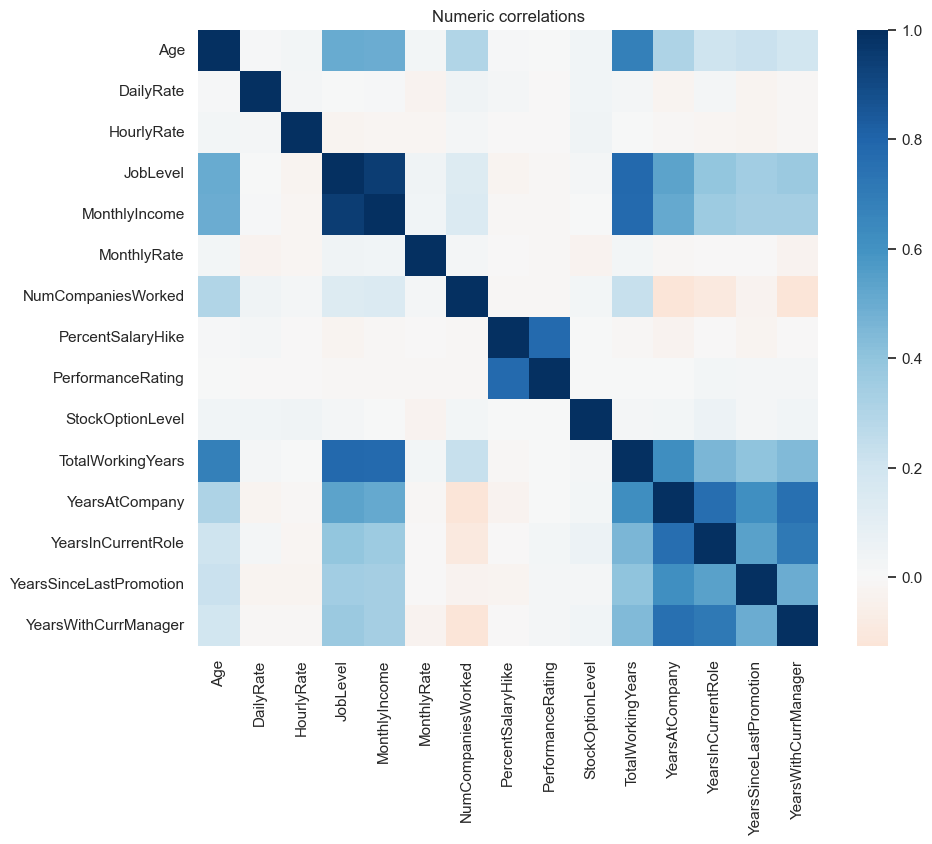

In [153]:
# Example numeric distributions vs Attrition
numeric_cols = att_df.select_dtypes(include=['int64','float64']).columns.tolist()

# Correlation heatmap for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(att_df[numeric_cols].corr(), annot=False, cmap='RdBu', center=0)
plt.title('Numeric correlations')
plt.show()

In [56]:
att_df.to_csv("../data/emp_attrition.csv")